In [4]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import cifar10

In [6]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

(<matplotlib.image.AxesImage at 0x7f5a9c61c1d0>, array([6], dtype=uint8))

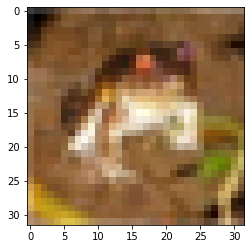

In [18]:
plt.imshow(x_train[0])

In [19]:
y_train[0]

array([6], dtype=uint8)

In [10]:
x_train[0].max()

255

In [11]:
x_train=x_train/255

In [12]:
x_test=x_test/255

In [14]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_cat_train = to_categorical(y_train,10)

In [17]:
y_cat_test = to_categorical(y_test,10)

### Building The Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#as this images are more complex compared to mnist we add conv and pooling layers
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [32]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 127s 3ms/sample - loss: 1.4989 - accuracy: 0.4588 - val_loss: 1.2877 - val_accuracy: 0.5420
Epoch 2/15
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.1544 - accuracy: 0.5938 - val_loss: 1.1205 - val_accuracy: 0.6028
Epoch 3/15
50000/50000 [==============================] - 110s 2ms/sample - loss: 1.0096 - accuracy: 0.6473 - val_loss: 1.0317 - val_accuracy: 0.6383
Epoch 4/15
50000/50000 [==============================] - 126s 3ms/sample - loss: 0.9000 - accuracy: 0.6864 - val_loss: 0.9813 - val_accuracy: 0.6569
Epoch 5/15
50000/50000 [==============================] - 108s 2ms/sample - loss: 0.8146 - accuracy: 0.7148 - val_loss: 0.9645 - val_accuracy: 0.6742
Epoch 6/15
50000/50000 [==============================] - 110s 2ms/sample - loss: 0.7412 - accuracy: 0.7404 - val_loss: 1.0185 - val_accuracy: 0.6700
Epoch 7/15
50000/50000 [==========================

In [33]:
metrics = pd.DataFrame(model.history.history)

In [34]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.498852,0.45876,1.287667,0.5420
1,1.154371,0.59382,1.120519,0.6028
2,1.009572,0.64732,1.031730,0.6383
3,0.899971,0.68636,0.981348,0.6569
4,0.814606,0.71480,0.964510,0.6742
5,0.741228,0.74038,1.018456,0.6700
6,0.671127,0.76384,0.996750,0.6704


In [35]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

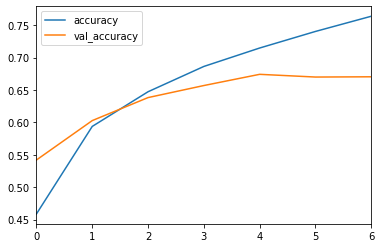

In [36]:
metrics[['accuracy','val_accuracy']].plot()

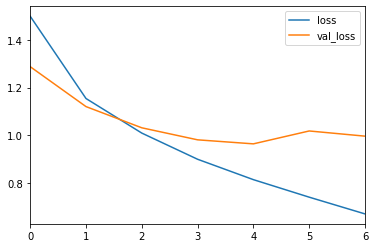

In [37]:
metrics[['loss','val_loss']].plot()

In [38]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9967499565124511, 0.6704]

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
predictions=model.predict_classes(x_test)

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1000
           1       0.79      0.76      0.77      1000
           2       0.52      0.64      0.57      1000
           3       0.49      0.49      0.49      1000
           4       0.67      0.56      0.61      1000
           5       0.62      0.54      0.57      1000
           6       0.73      0.79      0.76      1000
           7       0.85      0.62      0.71      1000
           8       0.71      0.84      0.77      1000
           9       0.75      0.71      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [43]:
confusion_matrix(y_test,predictions)

array([[769,  21,  36,  15,  17,   5,  12,   1,  96,  28],
       [ 38, 759,   9,  12,   2,   2,  14,   2,  73,  89],
       [ 69,  15, 641,  67,  54,  51,  59,  12,  22,  10],
       [ 35,  13, 113, 494,  61, 147,  73,  13,  25,  26],
       [ 39,   3, 152,  66, 556,  38,  67,  43,  23,  13],
       [ 30,   6,  95, 206,  37, 536,  37,  27,  14,  12],
       [ 12,   9,  70,  65,  20,  17, 788,   3,   8,   8],
       [ 31,   7,  86,  70,  71,  62,  19, 617,   7,  30],
       [ 74,  27,  13,   8,   7,   6,   4,   2, 836,  23],
       [ 48, 104,  20,  15,   6,   7,  12,   6,  74, 708]])

In [44]:
import seaborn as sns

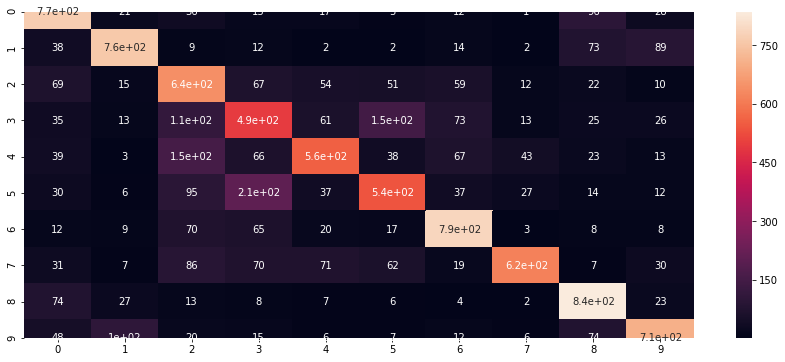

In [48]:
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [49]:
my_image=x_test[0]

In [50]:
my_image

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

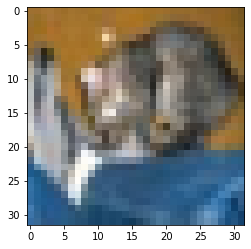

In [51]:
plt.imshow(my_image)

In [53]:
y_test[0],y_cat_test[0]

(array([3], dtype=uint8),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [54]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3])